In [27]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/BostonHousing.csv')
df.head(8)
# Описание сета
# CRIM - уровень преступности на душу населения в разбивке по городам
# ZN - доля жилой земли, разделенной на участки площадью более 25 000 кв.футов.
# INDUS - доля акров, не связанных с розничной торговлей, в городе.
# Фиктивная переменная CHAS - Charles River (1, если тракт граничит с рекой; 0 в противном случае)
# NOX - концентрация оксидов азота (частей на 10 миллионов)
# RM - среднее количество комнат в жилом помещении
# AGE - доля занимаемых владельцами квартир, построенных до 1940 года
# DIS - Взвешенные расстояния до пяти бостонских центров занятости
# RAD - индекс доступности к радиальным автомагистралям
# TAX - ставка налога на недвижимость по полной стоимости на 10 000 долларов
# PTRATIO - соотношение учеников и учителей в разбивке по городам
# B - 1000(Bk - 0,63)^2, где Bk - доля чернокожих в разбивке по городам
# LSTAT - более низкий статус населения в %
# MEDV - Средняя стоимость домов, занимаемых владельцами, в 1000 долларах

# MEDV - целевой параметр

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1


In [12]:
df.info()

# все значения числовые(целые и дробные)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [23]:
# общая информация о датасете
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
df.isnull().sum()

# в датасете нет нулевых значений

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

<Axes: >

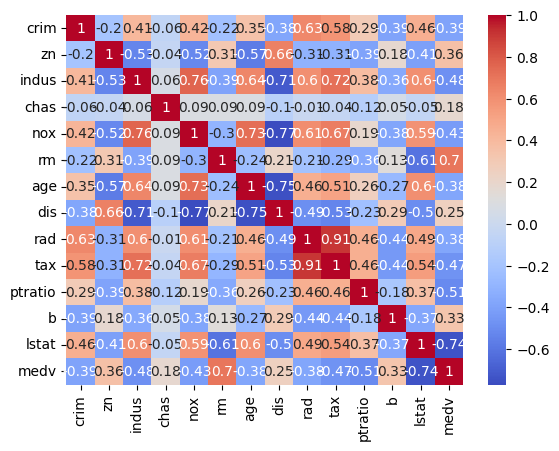

In [24]:
#матрица корреляции параметров
correlation_matrix = df.corr().round(2)
sb.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')

In [ ]:
# С целевым параметром цены хорошо коррелируют:
# 1. RM- количество комнат - положительно(0,7), тоесть имеет прямую зависимость
# 2. LSTAT - уровень населения - иотрицательно(-0,74), тоесть имеет обратную зависимость

In [21]:
# Посмотрим на среднюю цену при условии граничит ли недвижимость с рекой, где 1 - True

df.groupby('chas', observed=True).agg({'medv': 'mean'})

,medv
chas,
0,22.093843
1,28.440000


In [ ]:
# Таким образом видим что соседство с рекой так же положительно влияет на стоимость недвижимости

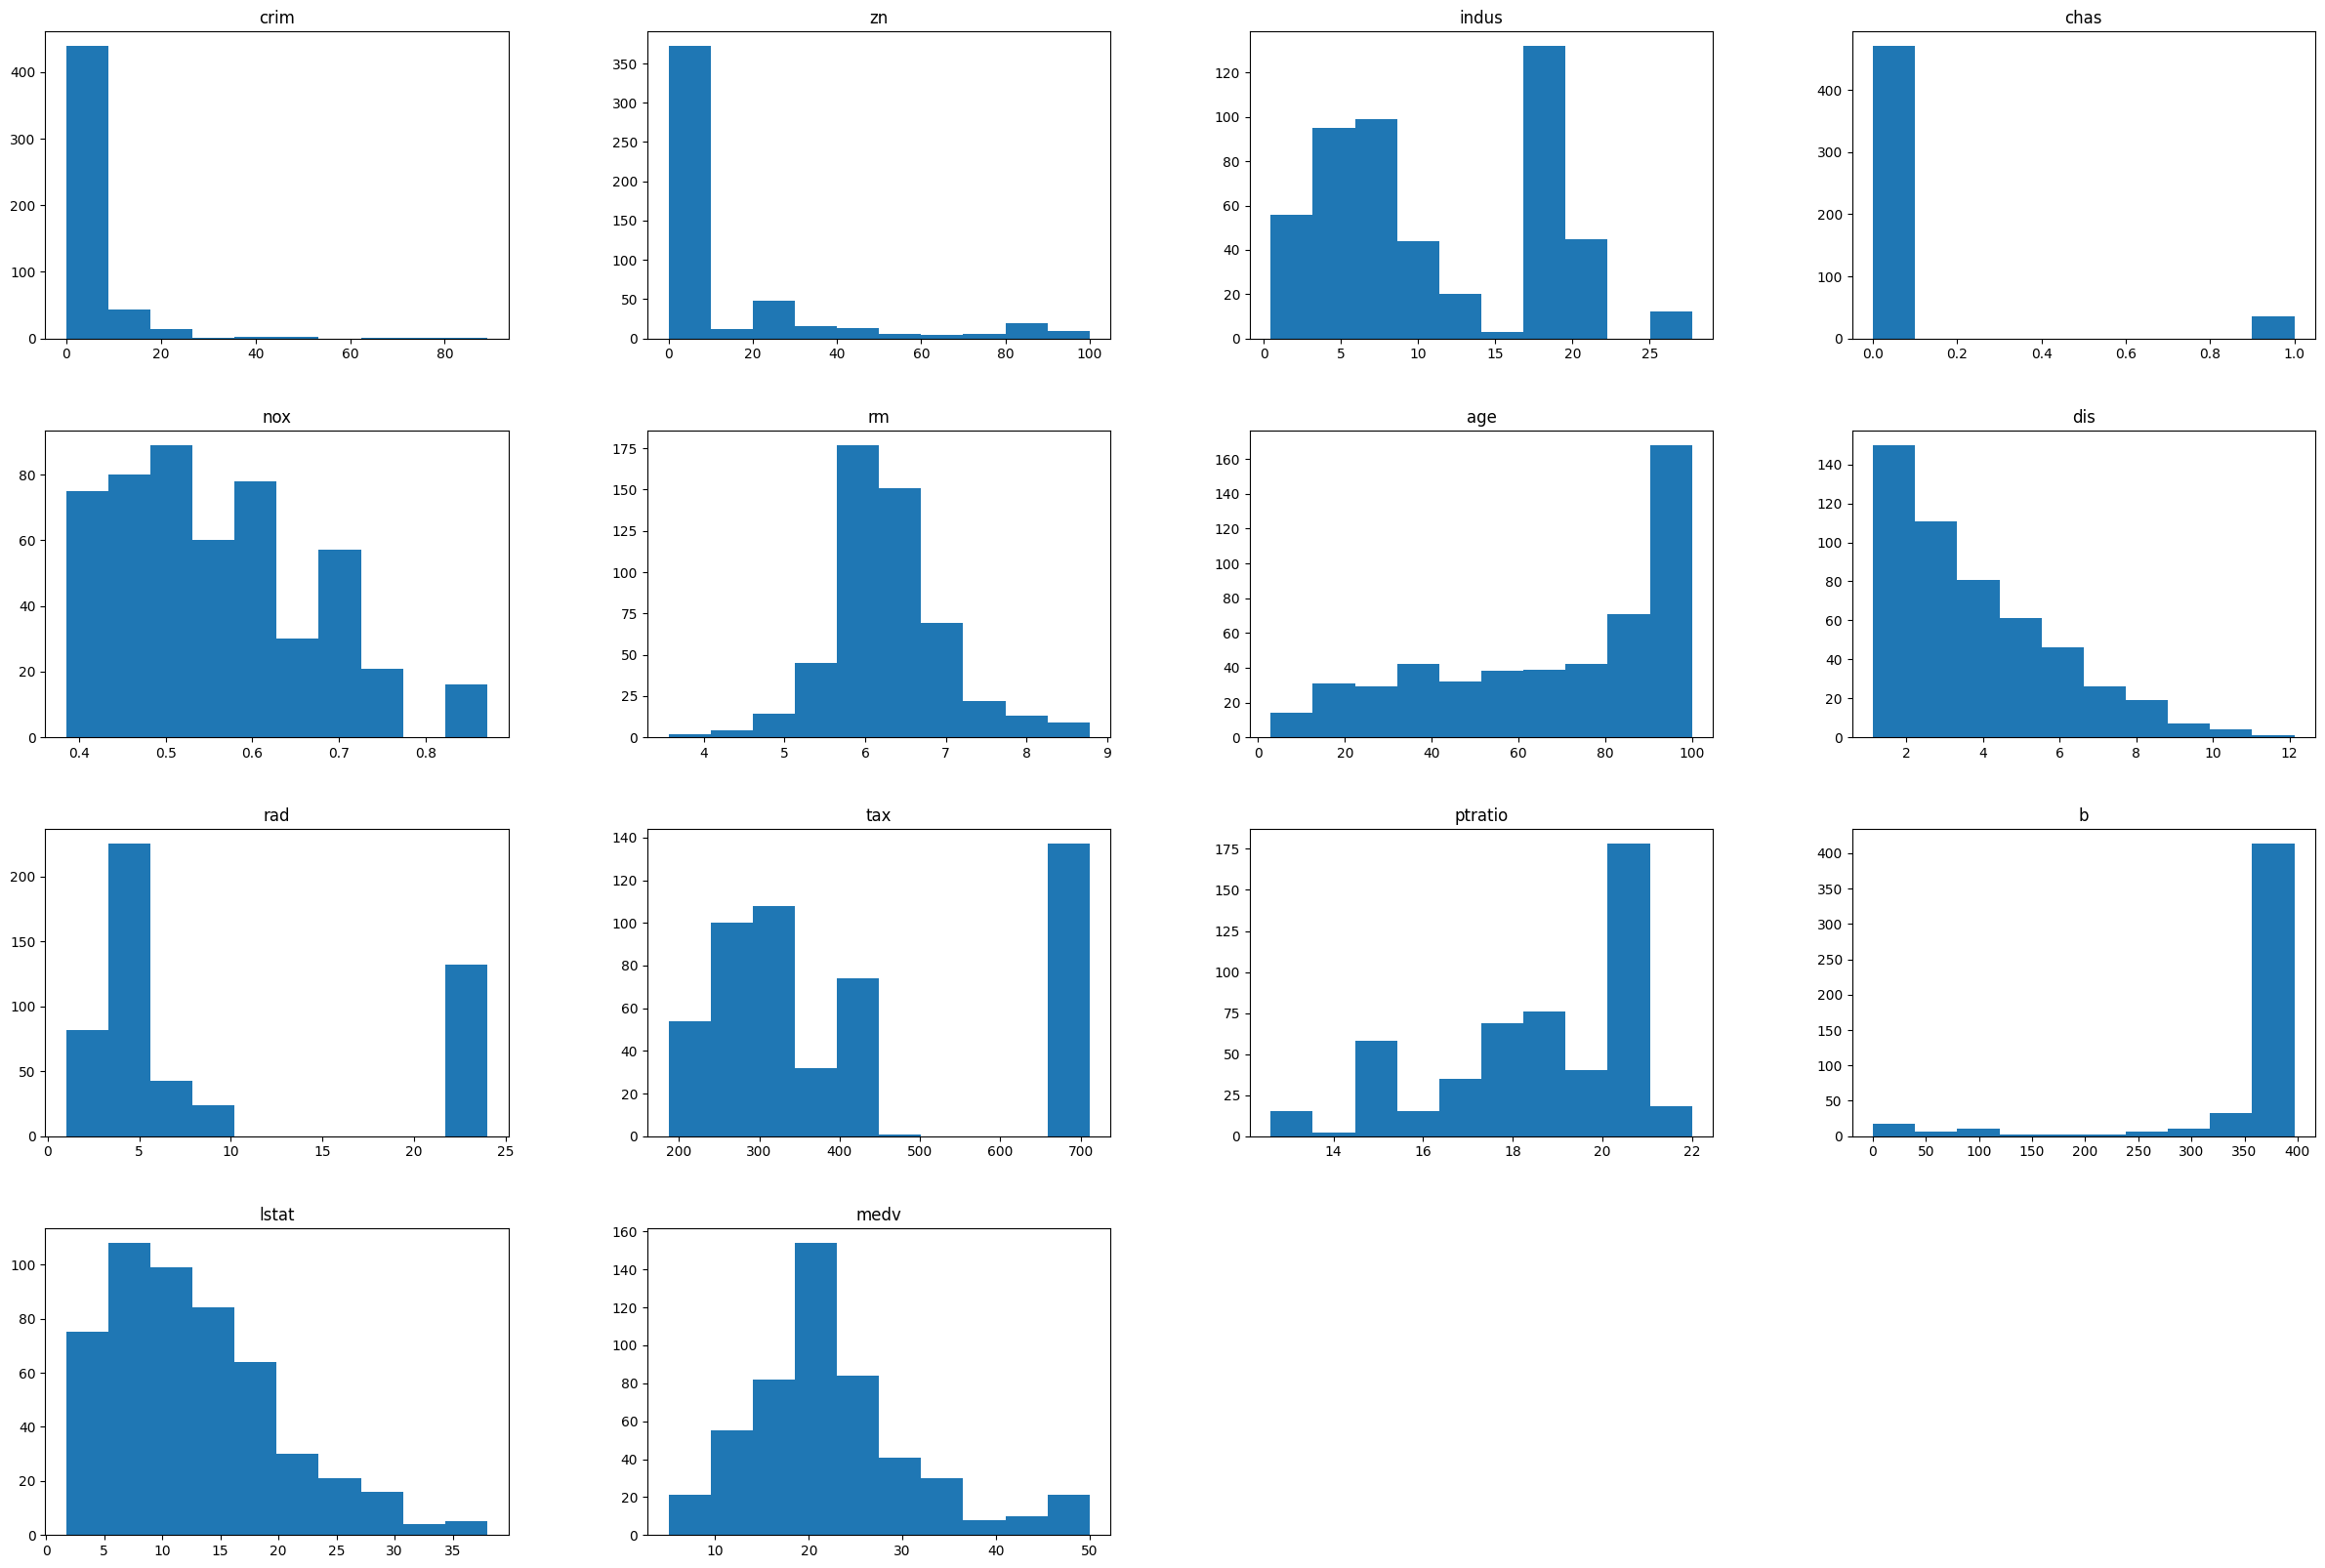

In [29]:

df.hist(figsize=(30, 20), grid=False)
plt.show()

In [ ]:
#Выводы

# 1. Стоимость квартир в Бостоне прямопропорционально зависит от количества комнат
# 2. Так же на стоимость влияет граничит ли едвижимость с рекой 
